In [1]:
from astropy import constants as cons
from astropy import units as un
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 20})

In [2]:
simulation = sys.argv[1]

In [3]:
x, y, z, vx, vy, vz, m, u = np.genfromtxt('b0.1/out0900.sph.ascii', usecols= (0,1,2,3,4,5,6,8), unpack=True)

In [4]:
index = np.where(m == np.amax(m))[0]
maxmass = len(index)

if maxmass == 1:
    xcm = x[np.argmax(m)]
    ycm = y[np.argmax(m)]
    zcm = z[np.argmax(m)]
    
    vcmx = vx[np.argmax(m)]
    vcmy = vy[np.argmax(m)]
    vcmz = vz[np.argmax(m)]
else:
    xcm = np.sum(x[index]*m[index]) / np.sum(m[index])
    ycm = np.sum(y[index]*m[index]) / np.sum(m[index])
    zcm = np.sum(z[index]*m[index]) / np.sum(m[index])
    
    vcmx = np.sum(vx[index]*m[index]) / np.sum(m[index])
    vcmy = np.sum(vy[index]*m[index]) / np.sum(m[index])
    vcmz = np.sum(vz[index]*m[index]) / np.sum(m[index])

In [5]:
r = np.sqrt((x-xcm)**2 + (y-ycm)**2 + (z-zcm)**2)
v = np.sqrt((vx-vcmx)**2 + (vy-vcmy)**2 + (vz-vcmz)**2)

In [6]:
index = np.argsort(r)

In [7]:
X = x[index]
Y = y[index]
Z = z[index]

VX = vx[index]
VY = vy[index]
VZ = vz[index]

R = r[index]
V = v[index]

U = u[index]
M = m[index]

Mencl = np.cumsum(M)

In [8]:
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

In [9]:
E = V**2 + U - (G*Mencl/R)

/tmp/ipykernel_2055/3790479378.py:1: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 + U - (G*Mencl/R)


In [10]:
unb = np.where(E > 0)[0]

Munb = M[unb]
percent = np.sum(Munb)*100/np.sum(M)

In [11]:
with open("Munb_percent.txt", "a") as myfile:
    myfile.write(str(round(percent,4))+'\t'+'output000'+'\n')

In [12]:
Mencl_un = np.cumsum(Munb)
R_un = R[unb]

In [13]:
Pos = np.array([X[~unb],Y[~unb],Z[~unb]])
Vel = np.array([VX[~unb],VY[~unb],VZ[~unb]])
P = M[~unb]*Vel

L = np.cross(Pos,P, axis = 0)
print('Lx = '+str(np.sum(L[0]))+
      ' Ly = '+str(np.sum(L[1]))+
      ' Lz = '+str(np.sum(L[2])))

Lt = np.array([np.sum(L[0]),np.sum(L[1]),np.sum(L[2])])
print('Norm L = '+str(np.linalg.norm(Lt)))

Lx = -0.0006045031019157043 Ly = -0.0033850955247980707 Lz = 107.70465623281964
Norm L = 107.70465628771186


In [14]:
#np.savetxt('Test2.txt',Mu,delimiter='\t')

In [15]:
#Mu = np.array([Mencl_un, R_un])

In [16]:
#np.savetxt('{}NewBins/{}scales.txt'.format(folder,name),Mencl,fmt='%5.8f',delimiter='\t')

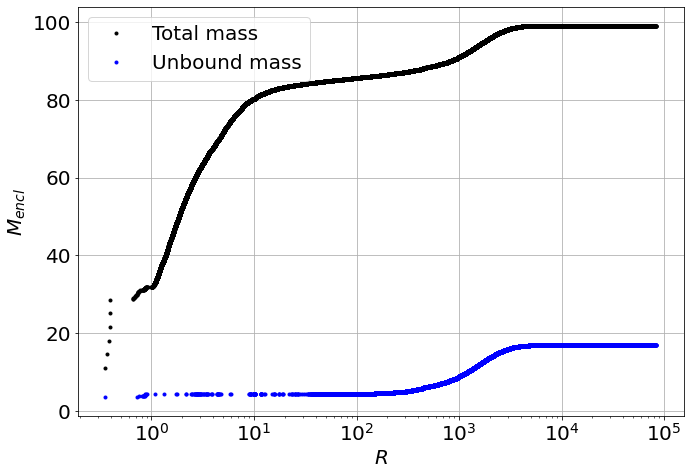

In [17]:
fig = plt.figure(figsize=(10, 7))

plt.plot(R,Mencl,'.k', label='Total mass')
plt.plot(R_un,Mencl_un,'.b', label='Unbound mass')

#plt.text(R[0] + 0.25, R[0] + 0.5,
        #'Unbound Mass = {:0.2e} %'.format(percent),
        #bbox={'facecolor': 'white', 'pad': 8}, fontsize=15)

plt.xlabel("$R$")
plt.ylabel("$M_{encl}$")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

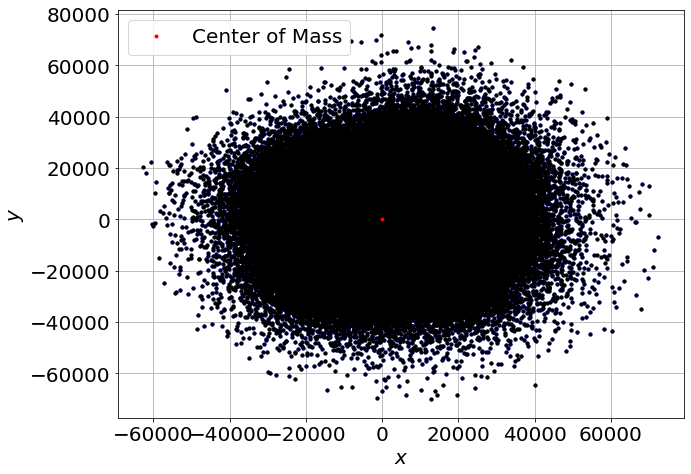

In [18]:
fig = plt.figure(figsize=(10, 7))

plt.plot(X,Y,'.b')
plt.plot(X[unb],Y[unb],'.k')
plt.plot(xcm,ycm,'.r', label='Center of Mass')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

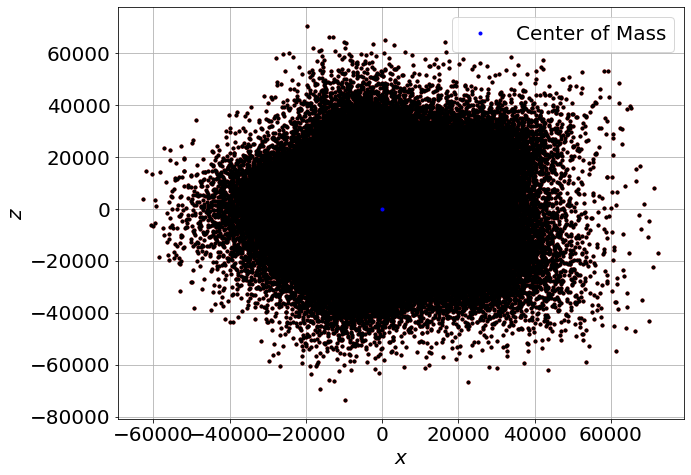

In [19]:
fig = plt.figure(figsize=(10, 7))

plt.plot(X,Z,'.r')
plt.plot(X[unb],Z[unb],'.k')
plt.plot(xcm,zcm,'.b', label='Center of Mass')
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
per, out = np.genfromtxt('4Myr/Munb_percent.txt', usecols= (0,1), unpack=True)
perR, outR = np.genfromtxt('Renzo/Munb_percent.txt', usecols= (0,1), unpack=True)
perb, outb = np.genfromtxt('b0.1/Munb_percent.txt', usecols= (0,1), unpack=True)
perb1, outb1 = np.genfromtxt('b1/Munb_percent.txt', usecols= (0,1), unpack=True)
perv1, outv1 = np.genfromtxt('v100/Munb_percent.txt', usecols= (0,1), unpack=True)
perv5, outv5 = np.genfromtxt('v500/Munb_percent.txt', usecols= (0,1), unpack=True)

In [21]:
time = np.linspace(0,1.8445e-02*len(per),len(per))
timeR = np.linspace(0,1.8445e-02*len(perR),len(perR))
timeb = np.linspace(0,1.8445e-02*len(perb),len(perb))
timeb1 = np.linspace(0,1.8445e-02*len(perb1),len(perb1))
timev1 = np.linspace(0,1.8445e-02*len(perv1),len(perv1))
timev5 = np.linspace(0,1.8445e-02*len(perv5),len(perv5))

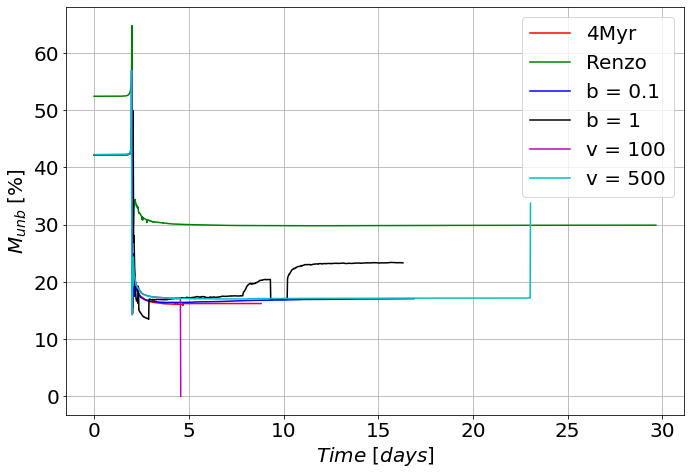

In [22]:
fig = plt.figure(figsize=(10, 7))

plt.plot(time,per,'-r', label = '4Myr')
plt.plot(timeR,perR,'-g', label = 'Renzo')
plt.plot(timeb,perb,'-b', label = 'b = 0.1')
plt.plot(timeb1,perb1,'-k', label = 'b = 1')
plt.plot(timev1,perv1,'-m', label = 'v = 100')
plt.plot(timev5,perv5,'-c', label = 'v = 500')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
Lx4, Ly4, Lz4, nm4 = np.genfromtxt('4Myr/L_evo.txt', usecols= (0,1,2,3), unpack=True)
Lx4_un, Ly4_un, Lz4_un, nm4_un = np.genfromtxt('4Myr/Lun_evo.txt', usecols= (0,1,2,3), unpack=True)

Lxv1, Lyv1, Lzv1, nmv1 = np.genfromtxt('v100/L_evo.txt', usecols= (0,1,2,3), unpack=True)
Lxv1_un, Lyv1_un, Lzv1_un, nmv1_un = np.genfromtxt('v100/Lun_evo.txt', usecols= (0,1,2,3), unpack=True)

In [24]:
Lnorm = np.linalg.norm(np.array([Lx4,Ly4,Lz4]), axis=0)
Lnorm_un = np.linalg.norm(np.array([Lx4_un,Ly4_un,Lz4_un]), axis=0)

Lnormv1 = np.linalg.norm(np.array([Lxv1,Lyv1,Lzv1]), axis=0)
Lnormv1_un = np.linalg.norm(np.array([Lxv1_un,Lyv1_un,Lzv1_un]), axis=0)

In [25]:
Lx4[np.argmax(np.abs(Lx4))] = np.nan
Ly4[np.argmax(np.abs(Ly4))] = np.nan
Lz4[np.argmax(np.abs(Lz4))] = np.nan

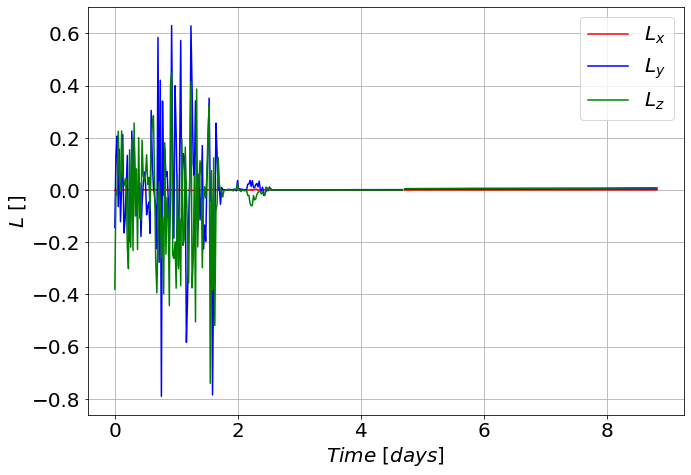

In [26]:
fig = plt.figure(figsize=(10, 7))

#plt.plot(time,Lnorm,'-r', label = r'$L$')
#plt.plot(time,Lnorm_un,'-b', label = r'$L_{un}$')

plt.plot(time,Lx4,'-r', label = r'$L_{x}$')
plt.plot(time,Ly4,'-b', label = r'$L_{y}$')
plt.plot(time,Lz4,'-g', label = r'$L_{z}$')

#plt.plot(time,Lx4_un,'-r', label = r'$L_{x}$')
#plt.plot(time,Ly4_un,'-b', label = r'$L_{y}$')
#plt.plot(time,Lz4_un,'-g', label = r'$L_{z}$')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$L$ $[]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

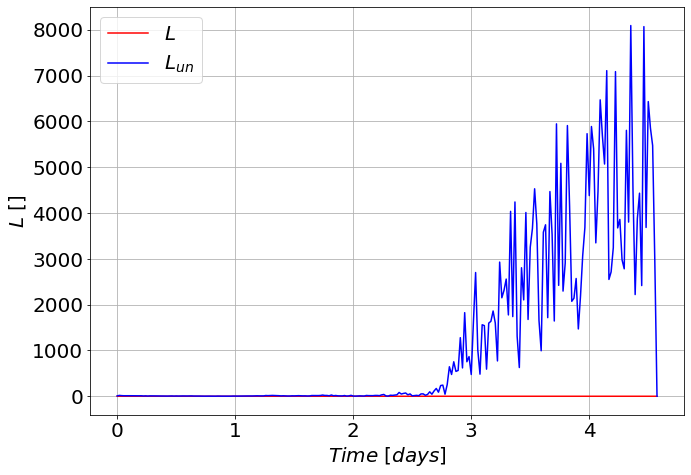

In [27]:
fig = plt.figure(figsize=(10, 7))

plt.plot(timev1,Lnormv1,'-r', label = r'$L$')
plt.plot(timev1,Lnormv1_un,'-b', label = r'$L_{un}$')

#plt.plot(time,Lx4,'-r', label = r'$L_{x}$')
#plt.plot(time,Ly4,'-b', label = r'$L_{y}$')
#plt.plot(time,Lz4,'-g', label = r'$L_{z}$')

#plt.plot(time,Lx4_un,'-r', label = r'$L_{x}$')
#plt.plot(time,Ly4_un,'-b', label = r'$L_{y}$')
#plt.plot(time,Lz4_un,'-g', label = r'$L_{z}$')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$L$ $[]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()